# Soft decision tree

## Traditional Decision Tree
* Decision Tree는 각각의 node에서 하나의 변수를 기준으로 순차적으로 2개 혹은 그 이상의 그룹으로 나누는 모형
    * 최초 시작점을 Root, 가지의 말단을 leaf node, Root와 leaf node 사이의 node들을 inner node라고 부른다.
    * 두개의 layer만 고려할 때에는 어떤 기준에 의해 갈라지기 전의 node를 parent node, 갈라진 후의 node들을 child node라고 얘기한다.
    * 각 node에서는 Node에서는 측정된 impurity가 가장 작은 split point들을 grid search를 통해 순차적으로 찾아가는데, impurity는 다음과 같이 정의된다.
         * Gini impurity는 CART에서 사용한 개념으로 다음과 같이 정의된다. (J개의 class를 가지고 있고, 각 $p_i, i = 1, \ldots, J$는 주어진 leaf node들이 각 class에 속하는 비율로 계산한다.)
    $$I_{G}(p)=\sum _{i=1}^{J}p_{i}\sum _{k\neq i}p_{k}=\sum _{i=1}^{J}p_{i}(1-p_{i})=\sum _{i=1}^{J}(p_{i}-{p_{i}}^{2})=\sum _{i=1}^{J}p_{i}-\sum _{i=1}^{J}{p_{i}}^{2}=1-\sum _{i=1}^{J}{p_{i}}^{2}$$
         *  ID3, C4.5 and C5.0에서는 부모 node의 정보량(Information)에 비해 자식 node들의 정보량 (각 node의 Information의 해당 child node에 분배된 sample의 갯수를 기준으로한 가중 평균)이 얼마나 크게 늘었는지를 측정하는 Information gain을 사용한다.
             * NOTE: Information은 정보이론에서 차용한 entropy라는 개념으로, 불확실성이 가장 큰 경우 가장 큰 값을 가지며, 다음과 같이 정의 된다. 여기서도 각 $p_i$는 주어진 node에 속한 data의 emprical probability를 의미한다.
         $$H(T)=I_{E}(p_{1},p_{2},...,p_{J})=-\sum _{i=1}^{J}p_{i}\log _{2}^{}p_{i}$$
             * 부모 node, 자식 node에서 각각 정보량을 구한 후에 Information gain은 다음과 같이 구한다
         $$ \overbrace {IG(T,a)} ^{\text{Information Gain}}=\overbrace {H(T)} ^{\text{Entropy(parent)}}-\overbrace {H(T|a)} ^{\text{Weighted Sum of Entropy(Children)}}$$
        
        * CART에서는 Continuous variable을 분류할 수도 있는데, 이 경우에는 부모 node와 자식 node의 variance 변동을 최대화하는 split point를 선택한다.
        $$I_{V}(N)={\frac {1}{|S|^{2}}}\sum _{i\in S}\sum _{j\in S}{\frac {1}{2}}(x_{i}-x_{j})^{2}-\left({\frac {1}{|S_{t}|^{2}}}\sum _{i\in S_{t}}\sum _{j\in S_{t}}{\frac {1}{2}}(x_{i}-x_{j})^{2}+{\frac {1}{|S_{f}|^{2}}}\sum _{i\in S_{f}}\sum _{j\in S_{f}}{\frac {1}{2}}(x_{i}-x_{j})^{2}\right)$$
        

## Soft Decision Tree

### 특징

  * Tree의 구조가 미리 정의되어 있다.
    * prone의 개념이 없고, 따라서 Leaf node와 inner node의 역할은 명확히 다르고, 이는 code에 반영된다.
    * Inner node에서는 lower level에서 data를 받아서 분류하고, Leaf node에서는 loss를 계산하고, 분류 결과(분류된 label)을 가진다.
    * NOTE: 매번 가지치기 여부를 판단하는 Decision tree에서는 leaf node의 역할을 inner node도 해야 한다.
    
    
  * 각 node에서 sample을 분류할 때, 하나의 변수가 아닌, dense network를 통해 얻어진 확률값을 이용한다.  
    * Soft Decision Tree의 핵심 개념은, 전통적인 tree 모형에서는 하나의 node에서는 하나의 변수에 의해 하나의 split point를 기준으로 관측치를 분류하였다면,
    * soft decision tree는 split point를 정의함에 있어서 ** 여러변수를 동시에 사용**하면서 각 node에서 어느 정도로 어느 child node로 분류되는지의 강도를 표현할 수 있도록, **sigmoid**함수를 사용한다는 점이다.
      * 6:4의 확률로 분류되는 example과 9:1의 확률로 분류되는 example은 다른 의미를 지님.
    ![](../images/decTree2.png 'decision tree on data space')


### Algorithm 개요

  * 각 node에서는 dense network를 통해 나온 scalar에 sigmoid를 적용한다. $j$ 번째 inner node에서 sample $x$를 분류하기 위해서는 다음과 같이 확률을 구한다.
  $$p_j(x) = \sigma(x \textbf w_j + b_j)$$
  
  
  * soft한 정도를 결정하기 위해 $\beta$라는 parameter를 도입하여 각 node에서 확률값을 구할 때 다음과 같이 처리한다.
  $$p_j(x) = \sigma(\beta ( x \textbf w_j + b_j))$$
  
  
  * 위의 확률을 바탕으로 확률이 0.5보다 크면 오른쪽 node로 작으면 왼쪽 node로 할당한다.
  $$Output = \left\{\begin{eqnarray} Q_{left}, & \quad p(x) <0.5\\ Q_{right}, & \quad p(x) >0.5\\\end{eqnarray}\right.$$
  
  
  * root node에서부터 매 layer를 거치면서 최종 leaf node에 도달할 때까지 할당된 확률을 곱하여 path probability를 구하고, 이를 path probability가 각 node에서 정제된 information을 전달하는 역할을 한다 (개념적으로 기존의 DNN과는 좀 다른 형태임).
  
  
  * depth가 $d$인 network을 고려하면, root node에서 $k_1, \ldots, k_d$의 inner node를 거쳐서 $l$ 번째 leaf node에 도달하는 sample의 경우, 다음과 같이 path probability,$P^l(x)$는 다음과 같이 얻을 수 있다.
  $$P^l_{k_1, k_2, \ldots, k_d}(x) = p_{k_1}(x)\cdot p_{k_2}(x)\ldots \cdot p_{k_d}(x)$$
  
  
  * 각 leaf node에서는 $k$개의 class에 해당하는 확률을 softmax을 통해 얻는다. $l$ 번째 Leaf node의 $k$개 class에 대한 확률 분포를 $Q = [Q_1,\ldots, Q_K]$라고 하면, $Q$은 다음과 같이 얻는다.
  $$Q_k = \frac{\phi_k}{\sum \exp(\phi_k)}, \quad k =1, \ldots, K$$
    * 각 leaf node는 각 class의 확률을 나타내게 될 확률변수,$\phi$를 모수로 가진다.
    * 매 node에 나타나는 Network와는 직접적인 상관이 없이 독립적으로 존재하는 parameter들이며, 이 parameter들은 path probability와 label에 의해서 update된다.
    * 각 확률변수는 0과 1 사이의 값을 가질 필요가 없는 것이 softmax가 확률을 구해주기 때문이다.
    
    
  * 각 sample들의 path probability를 그 leaf node에서 취하는 각 sample의 중요도로 평가하여 다음과 같은 Loss function을 정의한다. sample $x$에 해당하는 target의 one-hot encoding을 $T = [T_1, \ldots, T_K]$라고 하면,
  $$L(x) = \sum_{l \in \textrm{ Leaf node}} P^l(x)\sum_{k=1}^K T_k \log(Q_k^l)$$
    * 최종 leaf에 도달하는 sample이 같은 label을 많이 가지면 가질수록 loss는 작아진다.
    * 주어진 leaf node에 속할 path probability가 큰 sample의 target이 유리하도록 학습이 될 것이고,
    * path probability가 큰 sample과 같은 label을 가지는, 혹은 비슷한 성질을 가지는 label 중심으로 leaf node는 변화되어 갈 것이다.
    
    
  * 각 node에서 너무 한쪽으로만 쏠리지 않도록 하기 위해 다음과 같은 penalty를 도입한다. 
    * $i$번째 node에서 $n$개의 sample이 있다고 할 때, 다음과 같이 정의된다.
  $$C_i = -\lambda \cdot 0.5 \cdot \{\log(\alpha_i) + \log(1-\alpha_i)\}, \textrm{ where, }\alpha_i = \sum_{j=1}^n \frac{P^i(x_j)p_i(x_j)}{\sum P^i(x_j)}$$
    * 각 inner node에서 분류되는 확률이 0.5에 가까우면 penalty값은 작아지고, 그렇지 않으면 penalty값은 커진다.
    * depth가 깊어지면 깊어질 수록 각 node의 순도는 높아질 것이므로, 같은 비율로 sample을 split한다는 조건은 크게 중요하지 않을 수 있으므로, $\lambda$는 depth에 따라 $\lambda$는 작아져야 함.
    * 논문에서는 $\lambda\propto 2^{-d}$로 정한다.
    
    
  * 이렇게 하여 최종적으로 최적화하여야 할 loss function은 다음과 같이 쓸 수 있다.
  $$L = \sum_{i=1}^n \left\{\sum_{l \in \textrm{ Leaf nodes}} P^l(x_i)\sum_{k=1}^K T_{ik} \log(Q_k^l)\right\} + \sum_{v \in \textrm{ Inner nodes}} \lambda\cdot 0.5 \cdot \{\log(\alpha_v) + \log(1-\alpha_v)\},$$
  $$P^l_{k_1, k_2, \ldots, k_d}(x) = p_{k_1}(x)\cdot p_{k_2}(x)\ldots \cdot p_{k_d}(x), \quad \quad \alpha_v = \sum_{j=1}^n \frac{P^v(x_j)p(x_j)}{\sum P^v(x_j)}$$
  
  
  * 다음의 내용은 구현하지 못한 부분
  
  > As one descends the tree, the expected fraction of the data that each node sees in any given training batch **decreases exponentially**. This means that the computation of the actual probabilities of using the two sub-trees becomes less accurate.
  
  > *To encounter this we can maintain an exponentially decaying running average of the actual probabilities with a time window that is exponentially proportional to the depth of the node.* => **Hard to understand**
  
### NOTE


  * 해석자체에서 활용을 하기에는 문제가 있음
    * 결국에는 feature map을 보는 방법이므로, clear하지 않고, 우리처럼 해석할 수 없는 feature를 가지고 있는 경우 사용 불가하다고 생각됨
      ![](../images/paper-fig2.png 'Figure 2 in papaer')
      ![](../images/paper-fig3.png 'Figure 3 in papaer')
    
  * 가지가 늘어갈 때마다 node의 개수가 exponential하게 증가하여 training하는데 시간이 너무 오래 걸림
  
  
  * 반면에 Prediction 자체는 논문에서도 그렇게 높지 않다고 인정하고 있음
  
  
  * 하지만 아이디어 자체는 재미있어 개념은 알아둘 만 함.


## Remarks on code

  * Program이 재귀적으로 작성한다.
    * depth에 구애받지 않는 code 작성을 위해서는 자기참조를 해야 한다.
    * 각 node에서는 node의 정보를 저장하고, node에서 취할 행동을 method로 가지고 있되, 구조(leaf node의 갯수)가 어떻게 될지 모르므로, leaf node의 정보를 array 형태로 저장해 두어야 한다.
    
  * Leaf node 정보는 self.leaf_accumulator에 append하면 된다.
    * 재귀용법에서 이게 가능한 건 inner node에는 Q, path_probability값을 무시하므로 가능
    
  * Penalty의 경우에는 Inner node 정보를 계속 append하면 중복으로 쌓이는 문제가 있어, 각 node가 가지고 있는 penalty를 나중에 모아와야 한다.
    
  * 예측은 별도의 함수로 빼놓았음
    * prediction은 data를 forward시키고 난 후에,
    * 각 node에 도착할 path probability를 비교해서 가장 확률이 높은 node의 분포를 예측값으로 사용
    * 이를 위해서는 loss를 계산할 때와 같은 정보가 필요함. (필요한 정보는 Q와 path-probability)

# Load Libreary

In [1]:
import os
import time
import pickle
import numpy as np
import mxnet as mx
from mxnet import nd, autograd, gluon
from tqdm import tqdm, tqdm_notebook

gpu_ctx = mx.gpu(0)
cpu_ctx = mx.cpu(0)

/home/kionkim/anaconda3/envs/kion_venv_mxnet/lib/python3.6/site-packages/urllib3/contrib/pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL


# Load Data

In [2]:
mnist = mx.test_utils.get_mnist()
#print(mnist['train_data'][0].shape)

train_data = np.reshape(mnist['train_data'],(-1,28*28))
test_data = np.reshape(mnist['test_data'],(-1,28*28))

batch_size = 64
OUT_DIM = 10
n_batches = train_data.shape[0]/batch_size
train_iter = mx.io.NDArrayIter(data={'data': train_data}, label={'label': mnist['train_label']}, batch_size = batch_size)
test_iter = mx.io.NDArrayIter(data={'data': test_data}, label={'label': mnist['test_label']}, batch_size = batch_size)

## Sample data to examine (ignore this when run)

In [3]:
train_iter.reset()
test_iter.reset()
    
n_batch_train = 0
for batch in train_iter:
    n_batch_train +=1
    data = batch.data[0]
    label = batch.label[0]
    if n_batch_train == 1:
        break

# Define Function

In [4]:
class InnerNode(gluon.Block):
    def __init__(self, depth, super_node_name, node_name, **kwargs):
        super(InnerNode, self).__init__()
        self.kwargs = kwargs
        with self.name_scope():
            # Parameter
            self.fc = gluon.nn.Dense(units = 1, activation = None)
            self.beta = mx.nd.random.normal()
            self.beta.attach_grad()
        
        # 각 node가 지니고 있어야 하는 모형관련 정보
        self.data = None # Node에 속하는 data
        self.leaf = False # Leaf node 여부 (Leaf node에서는 loss를 계산해야 함)
        self.prob = None # FC를 통해 얻어진 확률
        self.penalties = []
        self.leaf_accumulator = []
        self.path_prob = None
        self.lmbd = self.kwargs['lmbd'] * 2 ** (-depth)
        
        # Layer specific 정보
        self.depth = depth
        self.super_node_name = super_node_name
        # 각 node의 이름 설정 (나중에 debugging에 용이함)
        if depth == 1:
            self.node_name = node_name
        else:
            self.node_name = super_node_name + ':' + node_name
        
        # constructor가 실행되는 순간 child node 생성
        self.build_child(depth) 
        
    def reset(self):
        self.data = None # Node에 속하는 data
        self.leaf = None # Leaf node 여부 (Leaf node에서는 loss를 계산해야 함)
        self.prob = None # FC를 통해 얻어진 확률
        self.penalties = []
        self.leaf_accumulator = []
        self.left.reset()
        self.right.reset()
       
    def build_child(self, depth):
        # 만약 max_depth보다 depth가 작지 않으면 child node 대신 Leaf node 생성
        # Binary 문제이므로, 2개의 child node가 생성됨
        if depth < self.kwargs['max_depth']:
            self.left = InnerNode(depth + 1, self.node_name, 'left', **self.kwargs)
            self.right = InnerNode(depth + 1, self.node_name, 'right', **self.kwargs)
        else:
            self.left = LeafNode(self.node_name, 'l_leaf', **self.kwargs)
            self.right = LeafNode(self.node_name, 'r_leaf', **self.kwargs)
            
    def forward(self, x, label, path_prob):
        # Label을 같이 가져와서 loss를 구하기
        # Network를 학습
        # Recursive하게 확률을 update 해나가는 것이므로, Leaf_node의 method와 이름이 같아야 함
        # 최종 Leaf node에서 나오는 path_probability와 predicted distribution Q를 저장함
        self.path_prob = path_prob
        # 현재 node에서 확률값 계산
        self.prob = nd.sigmoid(self.beta.as_in_context(self.kwargs['ctx'])*self.fc(x)) #self.beta.as_in_context(self.ctx)* #일단은 beta제외
        #self.prob = nd.sigmoid(self.fc(self.data)) #self.beta.as_in_context(self.ctx)* #일단은 beta제외

        left_leaf_accumulator = self.left(x, label, path_prob * (1-self.prob))
        right_leaf_accumulator = self.right(x, label, path_prob * self.prob)
        self.leaf_accumulator.extend(left_leaf_accumulator)
        self.leaf_accumulator.extend(right_leaf_accumulator)
        return(self.leaf_accumulator)
    
    # Node별 penalty term 계산하기
    # 좌나 우로 너무 쏠리지 않게 하는 역할
    # Leaf node가 아닌 경우에만 계산
    def get_penalty(self):
        alpha = nd.sum(self.prob * self.path_prob) / nd.sum(self.path_prob)
        penalty = - self.lmbd * 0.5 * (nd.log(alpha) + nd.log(1 - alpha))
        if not self.leaf:      
            left_penalty = self.left.get_penalty()
            right_penalty = self.right.get_penalty()  
            self.penalties.extend(penalty)
            self.penalties.extend(left_penalty)
            self.penalties.extend(right_penalty)
        return(self.penalties)

    # 실제 target과의 비교를 통해서 loss를 계산
    # Leaf node에 대해서만 계산
    def get_loss(self, loss = 0):
        # 재귀호출을 위해서...
        loss = self.left.get_loss(loss)
        loss = self.right.get_loss(loss)
        return loss
    
    def print_node_info(self):
        print('node name = {}, data size = {}'.format(self.super_node_name + self.node_name, self.data.shape))

In [5]:
class LeafNode(gluon.Block):
    def __init__(self, super_node_name, node_name, **kwargs):
        super(LeafNode, self).__init__()
        self.kwargs = kwargs
        with self.name_scope():
            self.par = mx.nd.random_normal(shape = (self.kwargs['output_dim'])
                                         , loc = 0, scale = 1., ctx = self.kwargs['ctx'])
            self.par.attach_grad()
        
        self.path = super_node_name
        self.node_name = node_name
        self.leaf = True
        self.path_prob = None
        self.x = None
        self.loss = 0
        
    def forward(self, x, label, path_prob):
        # 최종 결과 node는 우리가 classify하고자 하는 class의 갯수
        # 각 관측치가 가지고 있는, root로부터 leaf에 이르기까지 각 단계의 확률의  
        # one-hot labeling
        self.Q = nd.softmax(self.par)
        self.path_prob = path_prob
        target = np.zeros((label.shape[0], self.kwargs['output_dim']))
        target[np.arange(label.shape[0]), [int(x) for x in label.asnumpy()]] = 1
        self.target = nd.array(target).as_in_context(self.kwargs['ctx'])
        self.loss = - nd.sum(self.path_prob * nd.sum( self.target * nd.log(self.Q + 1e-10), axis = 1).expand_dims(1))
        return([[path_prob, self.Q, self.loss]])
    
    
    def get_penalty(self):
        return [0]
    
    def print_node_info(self):
        print('node name = {}, loss = {}'.format(self.super_node_name + node_name, self.loss))
        
    def get_loss(self, loss):
        if self.loss is not None:
            return loss + self.loss
        else:
            return loss
    
    def reset(self):
        self.loss = 0
        pass

In [6]:
def pred(tree, x, **kwargs):
    leaf_info = tree.leaf_accumulator
    n_data = x.shape[0]
    max_prob = [-1. for _ in range(n_data)]
    max_Q = [nd.zeros(kwargs['output_dim']) for _ in range(n_data)]
    for (path_prob, Q, _) in leaf_info:
        for i in range(n_data):
            if max_prob[i] < path_prob[i]:
                max_prob[i] = path_prob[i]
                max_Q[i] = Q
        Q_mat = nd.array([x.asnumpy() for x in max_Q])
        res = nd.argmax(Q_mat, axis = 1)
    return res

# Training

## Set parameters and Trainer

In [7]:
args = {}
args['lmbd'] = .5
args['output_dim'] = 10
args['ctx'] = gpu_ctx
args['cut_off'] = .5
args['max_depth'] = 6

tree = InnerNode(0, '', 'root', **args)
tree.collect_params().initialize(mx.init.Xavier(), ctx = args['ctx'])

trainer = gluon.Trainer(tree.collect_params(), 'adam', {'learning_rate': .001})

In [8]:
n_epoch = 10
print_period = n_epoch // 50
start = time.time()

training_loss = []
validation_loss = []
acc_trend = []
for epoch in tqdm_notebook(range(n_epoch), desc='epochs'):
    epoch_loss = 0
    epoch_val_loss = 0
    # Dataset을 처음부터 읽어오기 위해 reset
    train_iter.reset() 
    test_iter.reset()
    n_batch_train = 0
    correct = 0
    for batch in train_iter:
        # 아랫부분에서 평균 loss를 구하기 위한 counter
        n_batch_train +=1
        # Batch data 불러오기
        data = batch.data[0].as_in_context(gpu_ctx)
        label = batch.label[0].as_in_context(gpu_ctx)
        with autograd.record():
            # 학습하는 과정에서 나타나는 정보를 모두 제거. weight 정보는 남김
            tree.reset()
            # 최초 Path probability값을 1로 준다.
            prob = nd.ones(shape = (data.shape[0]), ctx = gpu_ctx).expand_dims(1)
            # 주어진 data를 흘려보내며, 최종 leaf node에서 Path probability, 추정된 분포 (Q), loss값을 구한다.
            # leaf_accumulator에 leaf node에서 얻어진 정보를 저장하게 된다.
            tree(data, label, prob)
            # leaf_accumulator의 정보를 새로운 변수에 저장한후
            leaf_info = tree.leaf_accumulator
            # Loss를 뽑아낸다.
            loss = 0.
            for l in leaf_info:
                loss = loss + l[2]
            # 각 inner node에서 penalty값을 찾아낸다.
            tree.get_penalty()
            penalty = 0
            for t in tree.penalties:
                penalty = penalty + t
            # Loss와 penalty를 더하여 최종 penalized loss를 구한다.
            pen_loss = loss + penalty
        pen_loss.backward()
        trainer.step(data.shape[0])
        # Loss의 합을 구한다.
        epoch_loss += nd.mean(loss).asscalar()
    tqdm.write('train done for batch = {}'.format(n_batch_train))
    n_batch_val = 0
    n_test_data = 0
    for batch in test_iter:
        tree.reset()
        n_batch_val +=1
        data = batch.data[0].as_in_context(gpu_ctx)
        label = batch.label[0].as_in_context(gpu_ctx)
        n_test_data += data.shape[0]
        prob = nd.ones(shape = (data.shape[0]), ctx = gpu_ctx).expand_dims(1)
        tree(data, label, prob)
        leaf_info = tree.leaf_accumulator
        loss = 0.
        for l in leaf_info:
            loss = loss + l[2] 
        tree.get_penalty()
        penalty = 0
        for t in tree.penalties:
            penalty = penalty + t
        pen_loss = loss + penalty
        epoch_val_loss += nd.mean(pen_loss).asscalar()
        pr = pred(tree, data, **args)
        correct += nd.sum(label == pr.as_in_context(gpu_ctx))
    accuracy = correct/n_test_data * 100
    epoch_loss /= n_batch_train
    epoch_val_loss /= n_batch_val
    tqdm.write('test done for batch = {}'.format(n_batch_val))
    training_loss.append(epoch_loss)
    validation_loss.append(epoch_val_loss)
    acc_trend.append(accuracy)
    
    if epoch % max(print_period,1) == 0:
        tqdm.write('Epoch %d, Training loss %s, Validation loss %s, Accuracy %f'%(epoch, epoch_loss, epoch_val_loss, accuracy.asscalar()))
        
end = time.time()
tqdm.write('Time elapsed: {:.2f}s'.format(end - start))

A Jupyter Widget

train done for batch = 938
test done for batch = 157
Epoch 0, Training loss 102.343565544, Validation loss 87.6343639398, Accuracy 73.148880
train done for batch = 938
test done for batch = 157
Epoch 1, Training loss 78.3094975201, Validation loss 77.3916058146, Accuracy 82.503983
train done for batch = 938
test done for batch = 157
Epoch 2, Training loss 70.4364297131, Validation loss 71.8328305141, Accuracy 86.982483
train done for batch = 938
test done for batch = 157
Epoch 3, Training loss 66.4686046104, Validation loss 69.2625821108, Accuracy 88.266319
train done for batch = 938
test done for batch = 157
Epoch 4, Training loss 64.2869125805, Validation loss 67.6828465796, Accuracy 88.833603
train done for batch = 938
test done for batch = 157
Epoch 5, Training loss 62.8098647437, Validation loss 66.529410344, Accuracy 89.261543
train done for batch = 938
test done for batch = 157
Epoch 6, Training loss 61.6459157411, Validation loss 65.5587732109, Accuracy 90.127388
train done for

In [17]:
validation_loss

[87.63436393980767,
 77.391605814551099,
 71.832830514118172,
 69.262582110751211,
 67.682846579582062,
 66.529410344020576,
 65.558773210853531,
 64.818647785551235,
 64.23425475199511,
 inf]

In [19]:
# Plotting library
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import Range1d
from bokeh.palettes import brewer

output_notebook()

color_map = brewer["Spectral"][10]
batch_x = np.linspace(1, n_epoch, len(training_loss) - 1)
p = figure(plot_width=400, plot_height=400)
p.line(batch_x, training_loss[:-1], color = color_map[0], line_width=2)
p.line(batch_x, validation_loss[:-1], color = color_map[1], line_width=2)
show(p)

Loading BokehJS ...

# Inspect results

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

## Top layer

In [50]:
label = tree.left.left.left.left.left.left.left.target

<module 'matplotlib.pyplot' from '/home/kionkim/anaconda3/envs/kion_venv_mxnet/lib/python3.6/site-packages/matplotlib/pyplot.py'>

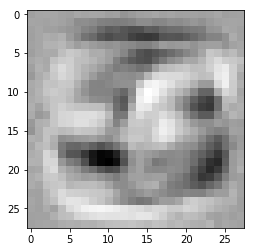

In [66]:
plt.imshow(tree.fc.weight.data().reshape((28, 28)).asnumpy(), cmap='Greys')
plt

### Left Branch Classification

In [86]:
idx = np.argsort(np.squeeze(tree.left.path_prob.asnumpy()))
top_examples = nd.argmax(label[idx[-5:], :], axis = 1)
print('left branch: {}'.format(top_examples.asnumpy()))

left branch: [ 4.  7.  9.  9.  4.]


### Right Branch Classification

In [90]:
idx = np.argsort(np.squeeze(tree.right.path_prob.asnumpy()))
top_examples = nd.argmax(label[idx[-5:], :], axis = 1)
print('right branch: {}'.format(top_examples.asnumpy()))

right branch: [ 6.  4.  6.  2.  0.]


## 1st Layer

<module 'matplotlib.pyplot' from '/home/kionkim/anaconda3/envs/kion_venv_mxnet/lib/python3.6/site-packages/matplotlib/pyplot.py'>

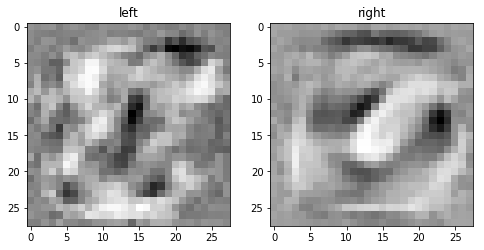

In [69]:
_, axarr = plt.subplots(1, 2, figsize=(8,4))
axarr[0].imshow(tree.left.fc.weight.data().reshape((28, 28)).asnumpy(), cmap='Greys')
axarr[0].set_title('left')
axarr[1].imshow(tree.right.fc.weight.data().reshape((28, 28)).asnumpy(), cmap='Greys')
axarr[1].set_title('right')
plt

### Left - Left Branch

In [91]:
idx = np.argsort(np.squeeze(tree.left.left.path_prob.asnumpy()))
top_examples = nd.argmax(label[idx[-5:], :], axis = 1)
print('left - left branch: {}'.format(top_examples.asnumpy()))

left - left branch: [ 1.  1.  1.  1.  1.]


### Left - right Branch

In [92]:
idx = np.argsort(np.squeeze(tree.left.right.path_prob.asnumpy()))
top_examples = nd.argmax(label[idx[-5:], :], axis = 1)
print('left - right branch: {}'.format(top_examples.asnumpy()))

left - right branch: [ 4.  7.  9.  9.  4.]


### Right - Left Branch

In [93]:
idx = np.argsort(np.squeeze(tree.right.left.path_prob.asnumpy()))
top_examples = nd.argmax(label[idx[-5:], :], axis = 1)
print('right - left branch: {}'.format(top_examples.asnumpy()))

right - left branch: [ 6.  0.  0.  6.  0.]


### Right - Right Branch

In [94]:
idx = np.argsort(np.squeeze(tree.right.right.path_prob.asnumpy()))
top_examples = nd.argmax(label[idx[-5:], :], axis = 1)
print('right - right branch: {}'.format(top_examples.asnumpy()))

right - right branch: [ 2.  8.  2.  2.  2.]


## 2nd Layer

<module 'matplotlib.pyplot' from '/home/kionkim/anaconda3/envs/kion_venv_mxnet/lib/python3.6/site-packages/matplotlib/pyplot.py'>

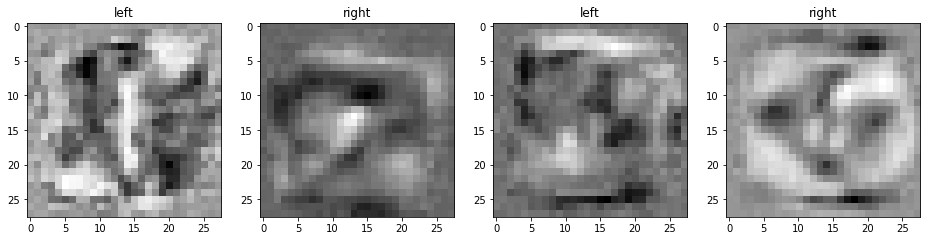

In [72]:
_, axarr = plt.subplots(1, 4, figsize=(16,4))
axarr[0].imshow(tree.left.left.fc.weight.data().reshape((28, 28)).asnumpy(), cmap='Greys')
axarr[0].set_title('left')
axarr[1].imshow(tree.left.right.fc.weight.data().reshape((28, 28)).asnumpy(), cmap='Greys')
axarr[1].set_title('right')
axarr[2].imshow(tree.right.left.fc.weight.data().reshape((28, 28)).asnumpy(), cmap='Greys')
axarr[2].set_title('left')
axarr[3].imshow(tree.right.right.fc.weight.data().reshape((28, 28)).asnumpy(), cmap='Greys')
axarr[3].set_title('right')
plt